### Download Dataset

In [ ]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!mv *.json kaggle.json
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle (2).json to kaggle (2) (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
mv: target 'kaggle.json' is not a directory


In [ ]:
!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

zomato-bangalore-restaurants.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip *.zip

Archive:  zomato-bangalore-restaurants.zip
replace zomato.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# EDA 

### Importing packages

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Data Analysis

In [349]:
df = pd.read_csv("zomato.csv")
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [350]:
drop_cols = ["url","address","phone"]

In [351]:
df.drop(drop_cols,inplace = True, axis = 1)
df.head(2)

name online_order book_table   rate  votes      location  \
0           Jalsa          Yes        Yes  4.1/5    775  Banashankari   
1  Spice Elephant          Yes         No  4.1/5    787  Banashankari   

       rest_type                                         dish_liked  \
0  Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari

In [352]:
df.duplicated().sum()

63

In [353]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51654 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51654 non-null  object
 1   online_order                 51654 non-null  object
 2   book_table                   51654 non-null  object
 3   rate                         43894 non-null  object
 4   votes                        51654 non-null  int64 
 5   location                     51633 non-null  object
 6   rest_type                    51427 non-null  object
 7   dish_liked                   23627 non-null  object
 8   cuisines                     51609 non-null  object
 9   approx_cost(for two people)  51309 non-null  object
 10  reviews_list                 51654 non-null  object
 11  menu_item                    51654 non-null  object
 12  listed_in(type)              51654 non-null  object
 13  listed_in(city)              51

Observations:
  * name => is a nominal data
  * online_order => should convert into [yes => 1, no => 0]
  * book_table => should convert into [yes => 1, no => 0]
  * dish_liked => dishes people liked in that rest. 
      * so we don't actually required this for predictive model [we can drop this]
  * rate -> contain null values should impute

In [355]:
### check null values

def null_values_percentage(df):
  total_count = df.shape[0]
  print(f"-------------------> {total_count} [records] <-------------\n")
  for col in df.columns:
    null_count = df[col].isnull().sum()
    print(f"{null_count/total_count*100:0.3f}% \t:\t {col}")

null_values_percentage(df)

-------------------> 51654 [records] <-------------

0.000% 	:	 name
0.000% 	:	 online_order
0.000% 	:	 book_table
15.023% 	:	 rate
0.000% 	:	 votes
0.041% 	:	 location
0.439% 	:	 rest_type
54.259% 	:	 dish_liked
0.087% 	:	 cuisines
0.668% 	:	 approx_cost(for two people)
0.000% 	:	 reviews_list
0.000% 	:	 menu_item
0.000% 	:	 listed_in(type)
0.000% 	:	 listed_in(city)


Observation:
  * dish_liked :- contain 54% null values
  * rate       :- contain 15% null values
  * location, rest_type, cuisines, approx_cost also contain null values but small amount ( total 1% )
    * but these features are importent in prediction of a restaurant rating so we can drop the null rows

In [356]:
drop_null_rows = ["location", "rest_type", "cuisines", "approx_cost(for two people)"]
df = df.dropna(subset = drop_null_rows,axis = 0)
null_values_percentage(df)

-------------------> 51086 [records] <-------------

0.000% 	:	 name
0.000% 	:	 online_order
0.000% 	:	 book_table
14.877% 	:	 rate
0.000% 	:	 votes
0.000% 	:	 location
0.000% 	:	 rest_type
54.148% 	:	 dish_liked
0.000% 	:	 cuisines
0.000% 	:	 approx_cost(for two people)
0.000% 	:	 reviews_list
0.000% 	:	 menu_item
0.000% 	:	 listed_in(type)
0.000% 	:	 listed_in(city)


### fixing rate null values 

In [357]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

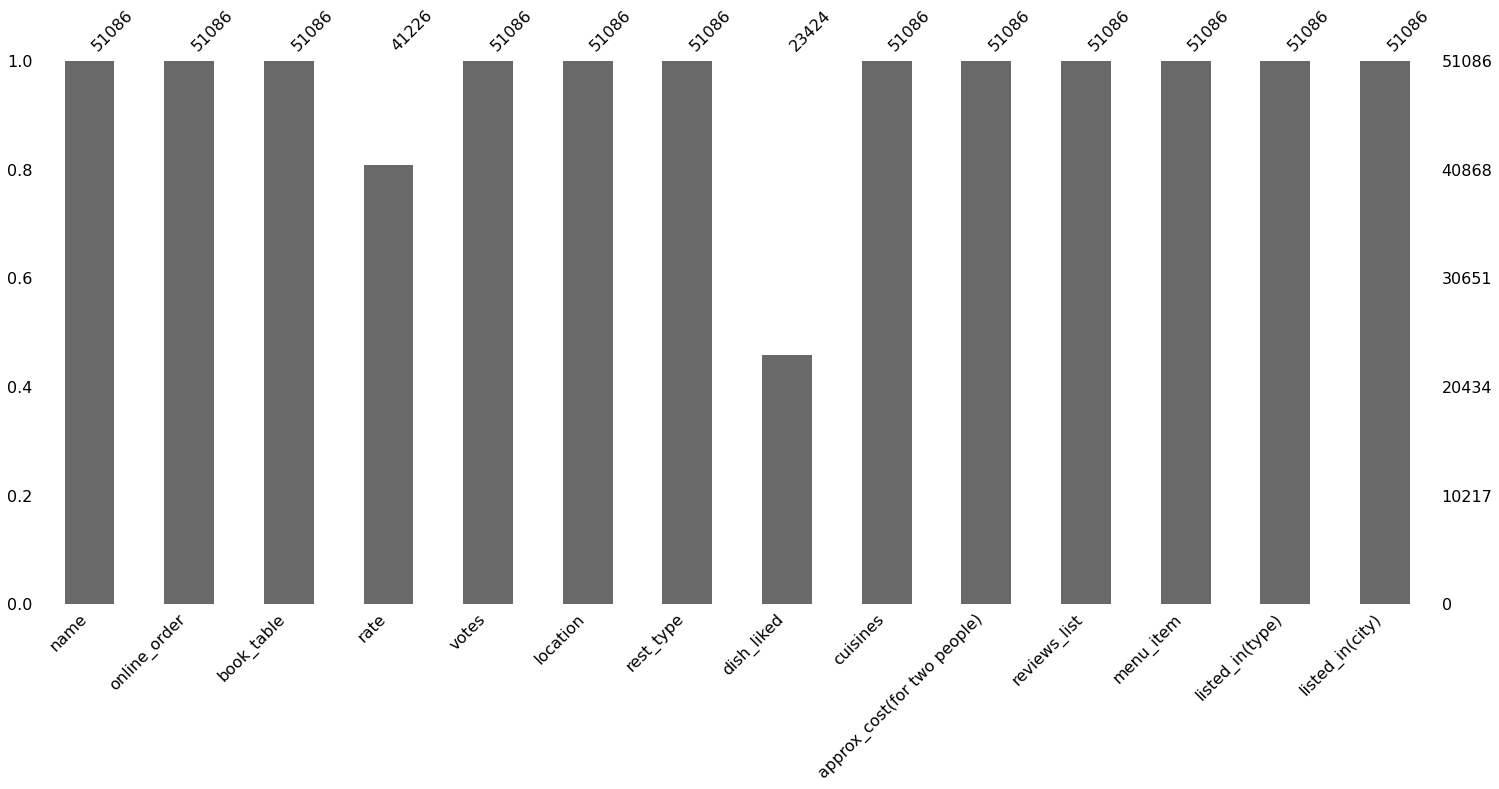

In [358]:
import missingno as msno

# converting NEW and '-' values into null value 
def convert(x):
  if x in ["NEW","-"]:
    return np.nan
  return x

df["rate"] = df["rate"].apply(convert)
plt.figure(figsize = (1,5))
msno.bar(df)
plt.show()

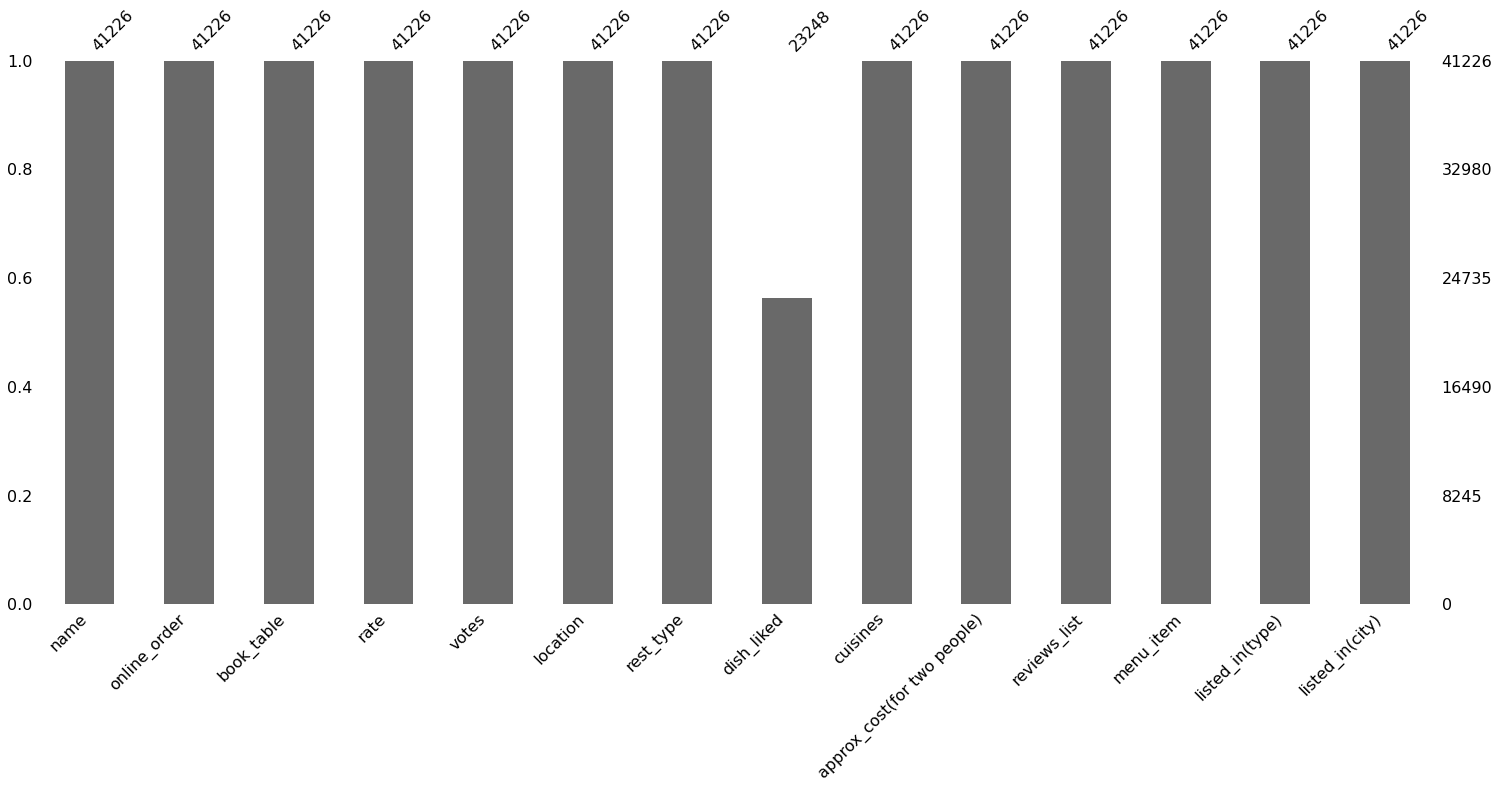

In [359]:
df = df.dropna(subset = ["rate"])
plt.figure(figsize = (1,5))
msno.bar(df)
plt.show()

### Convert dtypes

In [360]:
df.head()

name online_order book_table   rate  votes      location  \
0                  Jalsa          Yes        Yes  4.1/5    775  Banashankari   
1         Spice Elephant          Yes         No  4.1/5    787  Banashankari   
2        San Churro Cafe          Yes         No  3.8/5    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88  Banashankari   
4          Grand Village           No         No  3.8/5    166  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [361]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [362]:
## convert rating values into numerical format
df["rate"] = df["rate"].str.split("/").str[0].astype(float)
df["rate"]

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 41226, dtype: float64

In [363]:
## convert approx_cost values into numerical format
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [364]:
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].str.replace(",","").astype(float)

In [365]:
## convert online_order and book_table into numerical ordinal format
df["online_order"].unique()

array(['Yes', 'No'], dtype=object)

In [366]:
df["book_table"].unique()

array(['Yes', 'No'], dtype=object)

In [367]:
df["book_table"]   = df["book_table"].map({"Yes" : 1 , "No" : 0})
df["online_order"] = df["online_order"].map({"Yes" : 1 , "No" : 0})

In [368]:
df.dtypes

name                            object
online_order                     int64
book_table                       int64
rate                           float64
votes                            int64
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

### Visualization

In [369]:
df.head()

name  online_order  book_table  rate  votes      location  \
0                  Jalsa             1           1   4.1    775  Banashankari   
1         Spice Elephant             1           0   4.1    787  Banashankari   
2        San Churro Cafe             1           0   3.8    918  Banashankari   
3  Addhuri Udupi Bhojana             0           0   3.7     88  Banashankari   
4          Grand Village             0           0   3.8    166  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

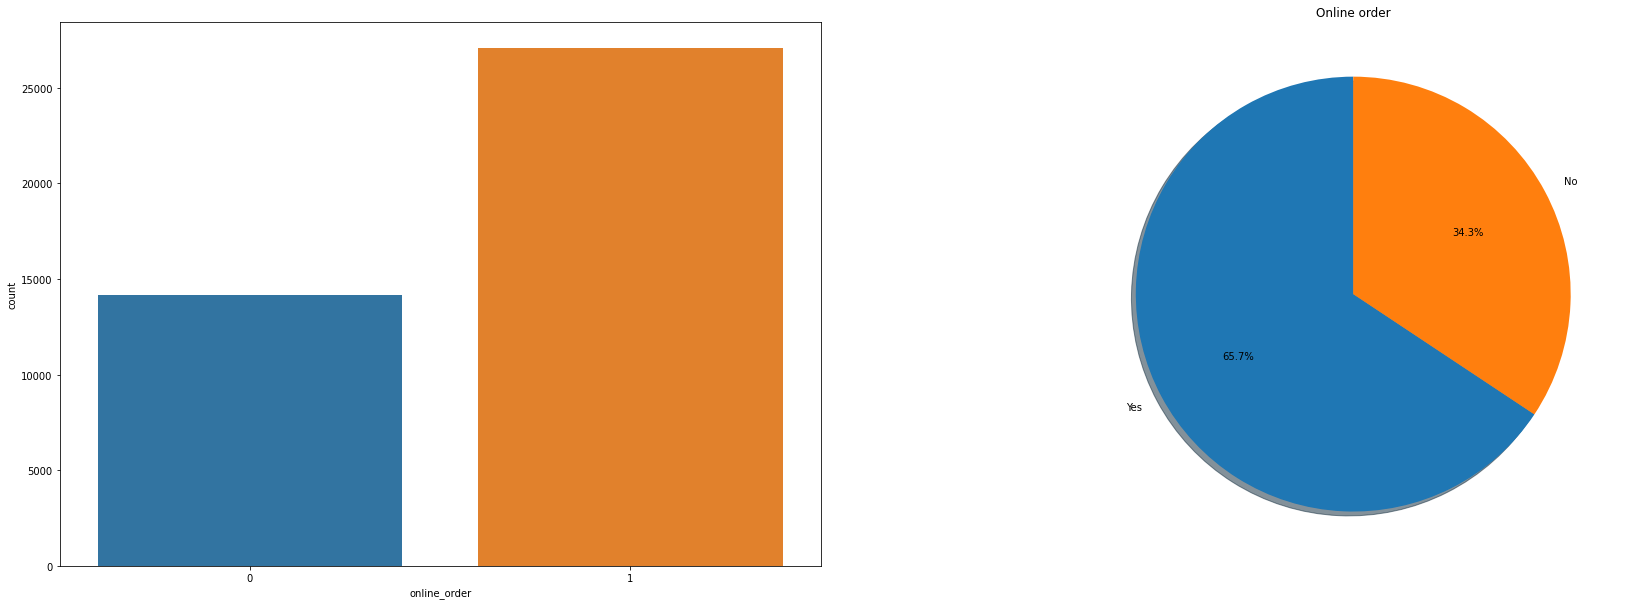

In [370]:
fig1, (ax1 , ax2) = plt.subplots(1,2)

sns.countplot(data = df, x = "online_order", ax=ax1)

labels = ["Yes",'No']
values = df['online_order'].value_counts().values
colors = ['green', 'blue']
ax2.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Online order')
plt.show()

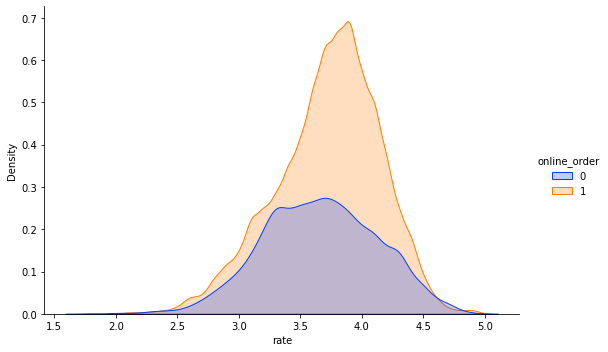

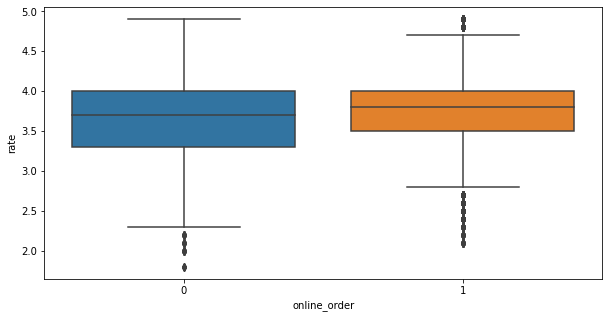

In [371]:
## checking is there any relationship b\w online order and rating 
sns.displot(data = df, x="rate", hue ="online_order",fill=True,height=5, aspect=1.5, kind="kde",palette=sns.color_palette('bright')[:2])
plt.show()
plt.figure(figsize = (10,5))
sns.boxplot(data = df, y = "rate", x ="online_order")

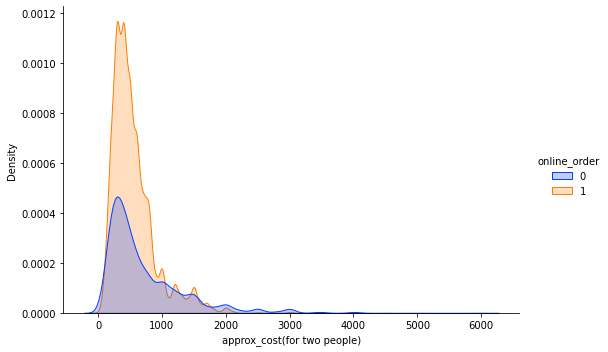

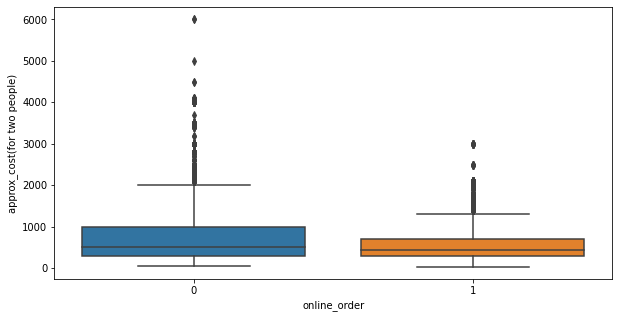

In [372]:
sns.displot(data = df, x="approx_cost(for two people)", hue ="online_order",fill=True,height=5, aspect=1.5, kind="kde",palette=sns.color_palette('bright')[:2])
plt.show()
plt.figure(figsize = (10,5))
sns.boxplot(data = df, y = "approx_cost(for two people)", x ="online_order")

Observation:
  * most of the restarents in bagloor provide online orders

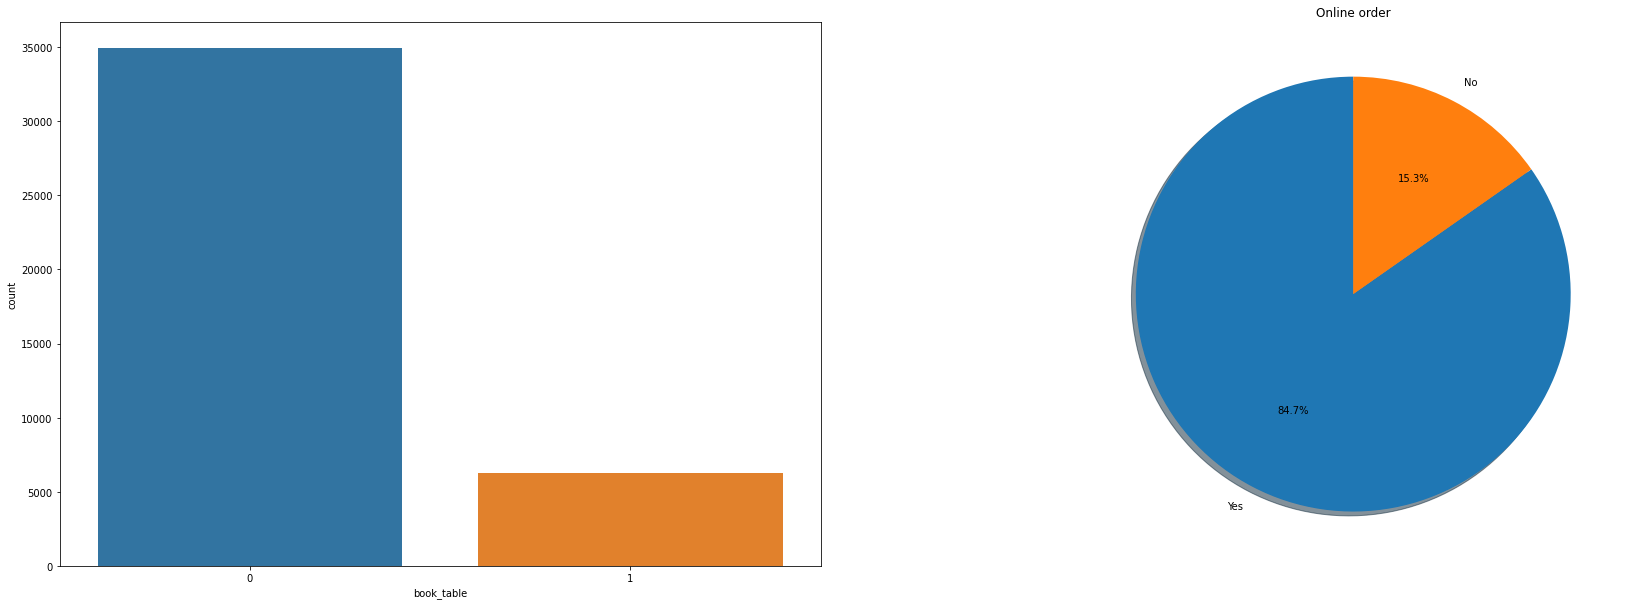

In [373]:
fig1, (ax1 , ax2) = plt.subplots(1,2)

sns.countplot(data = df, x = "book_table", ax=ax1)

labels = ["Yes",'No']
values = df['book_table'].value_counts().values
colors = ['green', 'blue']
ax2.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Online order')
plt.show()

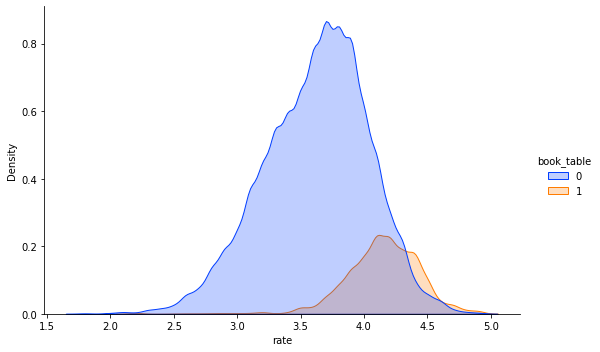

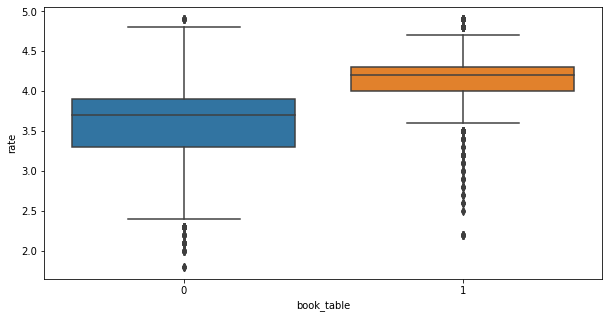

In [374]:
# fig1, (ax1 , ax2) = plt.subplots(1,2)
sns.displot(data = df, x="rate", hue ="book_table",fill=True,height=5, aspect=1.5, kind="kde",palette=sns.color_palette('bright')[:2])
plt.show()
plt.figure(figsize = (10,5))
sns.boxplot(data = df, y = "rate", x ="book_table")


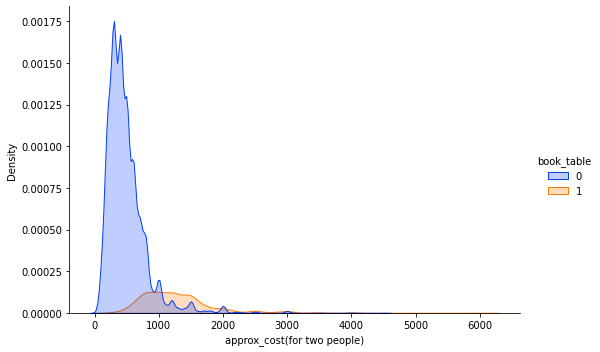

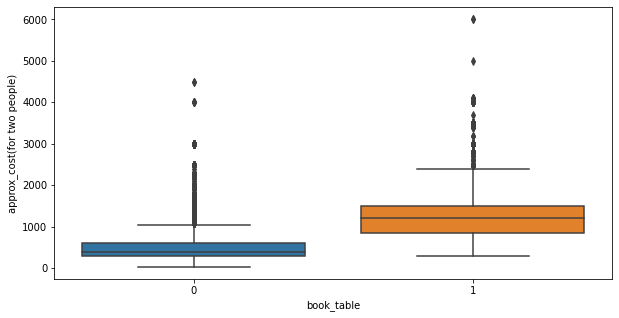

In [375]:


# fig1, (ax1 , ax2) = plt.subplots(1,2)
sns.displot(data = df, x="approx_cost(for two people)", hue ="book_table",fill=True,height=5, aspect=1.5, kind="kde",palette=sns.color_palette('bright')[:2])
plt.show()
plt.figure(figsize = (10,5))
sns.boxplot(data = df, y = "approx_cost(for two people)", x ="book_table")


Observation:
  * most of the restarent in bagloor are not providing table booking service

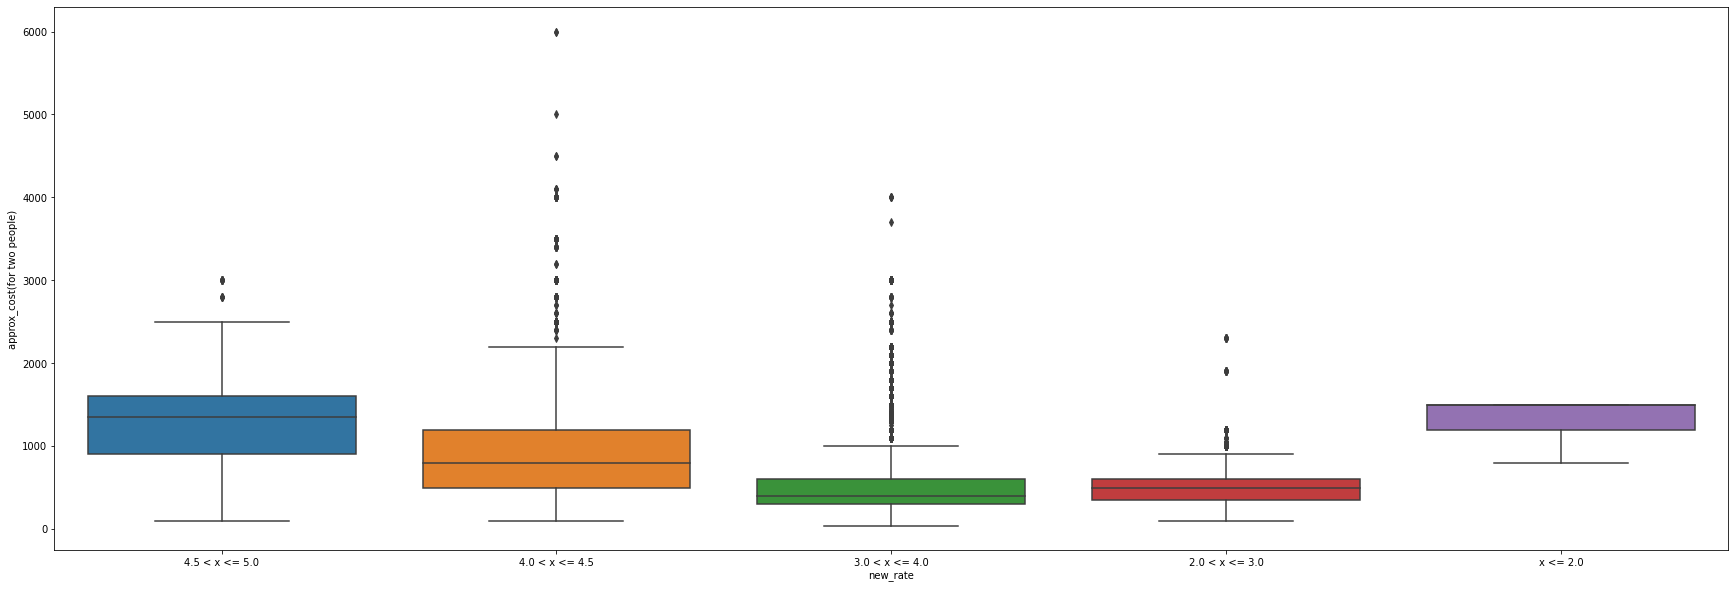

In [376]:
## price and rating relationship
# sns.boxplot(data = df[df["rate"] < 2.0], y = "approx_cost(for two people)")
# sns.boxplot(data = df[df["rate"] < 2.0], y = "approx_cost(for two people)")
test_df = df
test_df = test_df.sort_values(by=['rate'], ascending=False)
test_df.head()
test_df.dtypes
def transform(x):
  if x <= 2.0:
    return "x <= 2.0"
  if x <= 3.0:
    return "2.0 < x <= 3.0"
  if x <= 4.0:
    return "3.0 < x <= 4.0"
  if x <= 4.5:
    return "4.0 < x <= 4.5"
  else:
    return "4.5 < x <= 5.0"

test_df["new_rate"] = test_df["rate"].apply(transform)

sns.boxplot(data = test_df, y = "approx_cost(for two people)", x ="new_rate")

In [377]:
## mean cost values 
for val in test_df["new_rate"].unique():
  rows = test_df[test_df["new_rate"] == val]
  mean_cost = rows["approx_cost(for two people)"].median()
  print(f"{mean_cost:.2f}  \t: \t  {val} [{len(rows)}] ")

1350.00  	: 	  4.5 < x <= 5.0 [588] 
800.00  	: 	  4.0 < x <= 4.5 [8563] 
400.00  	: 	  3.0 < x <= 4.0 [28869] 
500.00  	: 	  2.0 < x <= 3.0 [3190] 
1500.00  	: 	  x <= 2.0 [16] 


Observation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'rest type')

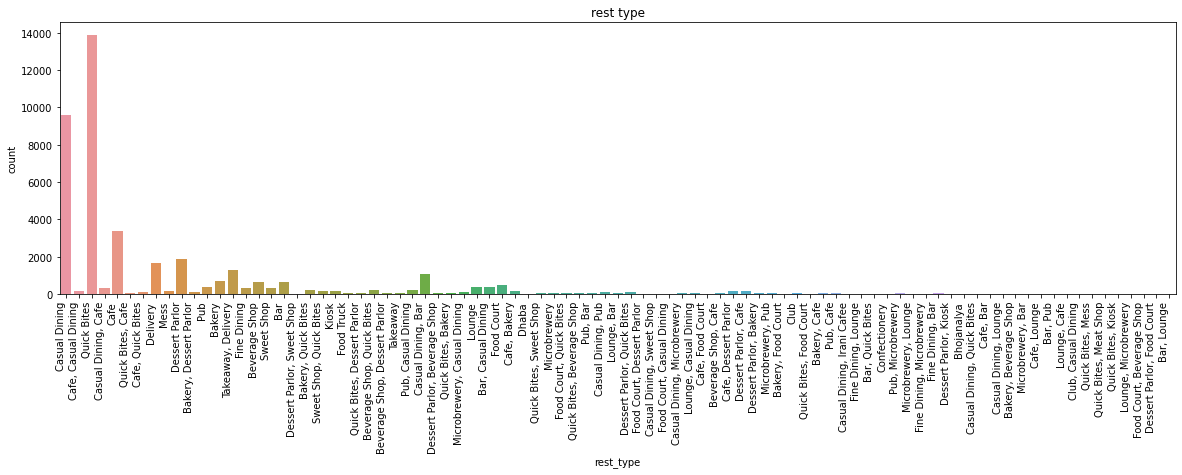

In [378]:
###
sns.countplot(df['rest_type'])
sns.countplot(df['rest_type']).set_xticklabels(sns.countplot(df['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.title('rest type')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'rest locaiton wise count')

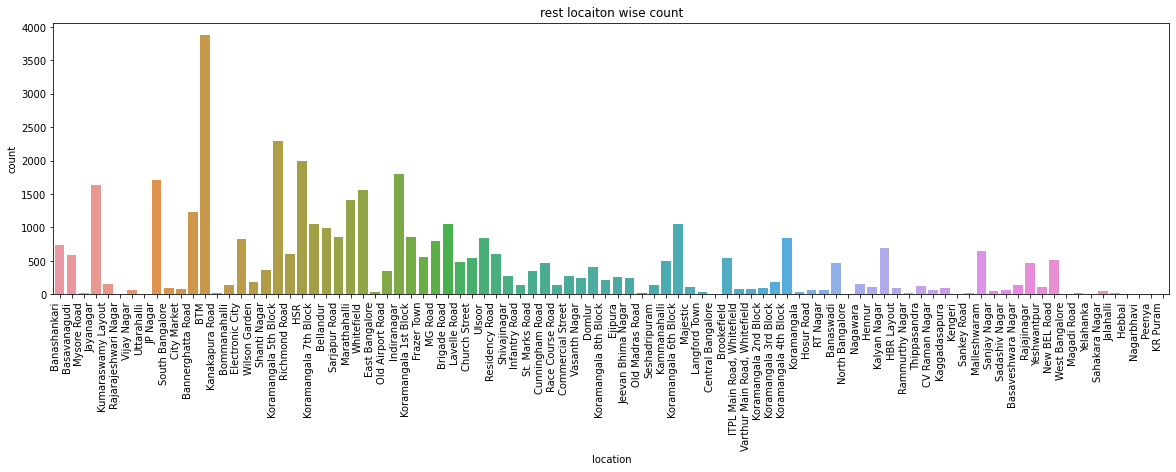

In [379]:

### most rest locations
sns.countplot(df['location'])
sns.countplot(df['location']).set_xticklabels(sns.countplot(df['location']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.title('rest locaiton wise count')

In [380]:
df["location"].value_counts()[:10]

BTM                      3873
Koramangala 5th Block    2296
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
Jayanagar                1634
Whitefield               1568
Marathahalli             1410
Bannerghatta Road        1224
Koramangala 7th Block    1055
Name: location, dtype: int64

Obeservations:
  - **most rest location in banglure** 
    1. BTM                      
    1. Koramangala 5th Block    
    1. HSR                      
    1. Indiranagar              
    1. JP Nagar                 
    1. Jayanagar                
    1. Whitefield               
    1. Marathahalli             
    1. Bannerghatta Road        
    1. Koramangala 7th Block    

In [381]:
df["rest_type"].value_counts()[:31]

Quick Bites                    13866
Casual Dining                   9605
Cafe                            3368
Dessert Parlor                  1850
Delivery                        1666
Takeaway, Delivery              1278
Casual Dining, Bar              1092
Bakery                           704
Bar                              640
Beverage Shop                    638
Food Court                       496
Bar, Casual Dining               385
Lounge                           381
Pub                              351
Sweet Shop                       346
Fine Dining                      342
Casual Dining, Cafe              310
Beverage Shop, Quick Bites       239
Pub, Casual Dining               236
Bakery, Quick Bites              225
Mess                             180
Cafe, Casual Dining              173
Sweet Shop, Quick Bites          171
Kiosk                            152
Cafe, Bakery                     146
Cafe, Dessert Parlor             144
Dessert Parlor, Cafe             144
C

In [382]:
df["rest_type"].value_counts()
cols = df["rest_type"].value_counts()[:10].index
def convert(x):
  if x in cols:
    return x
  else:
    return "other"


df["type"] = df["rest_type"].apply(convert)

In [383]:
## we only took top 30 rest_type others are making as "other catagory"
cols = df["rest_type"].value_counts()[:31].index
df["rest_type"] = df["rest_type"].apply(convert)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text major ticklabel objects>)

<Figure size 1440x720 with 0 Axes>

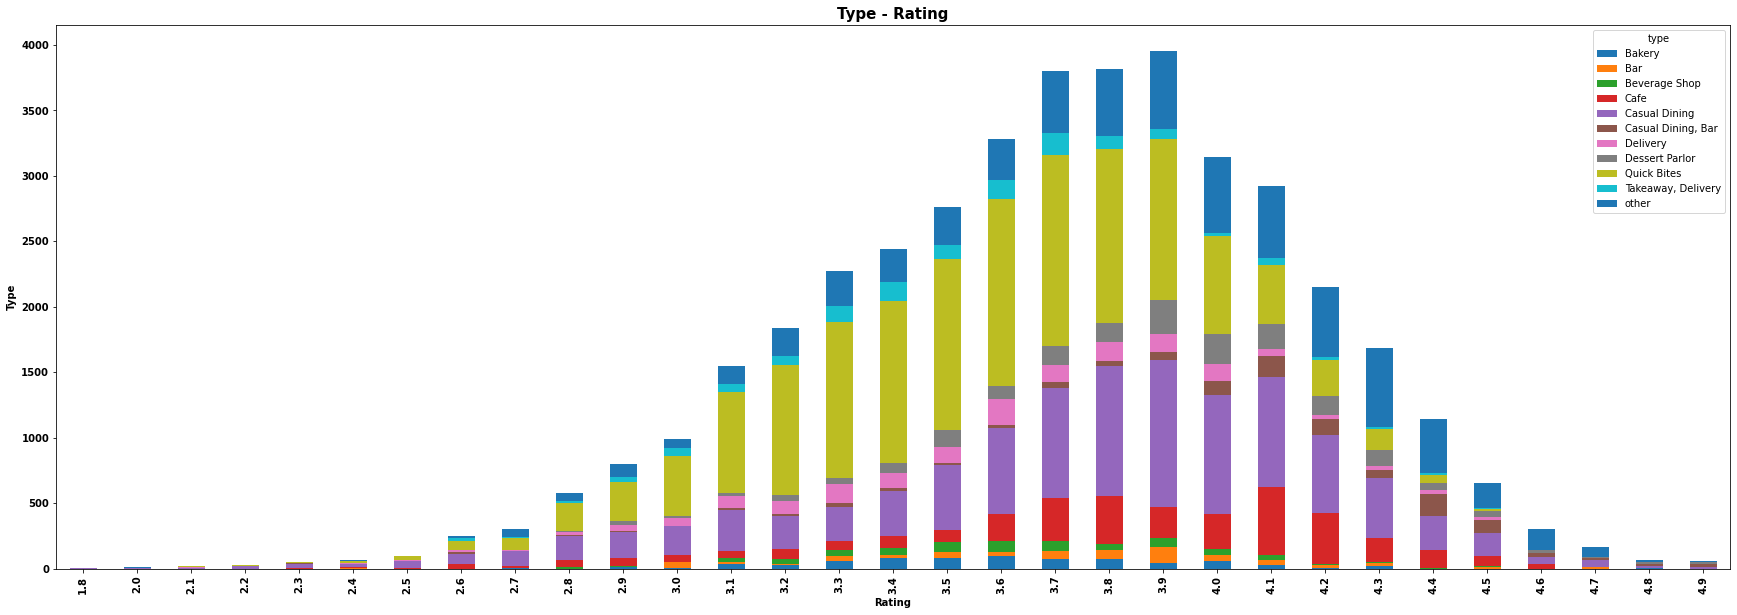

In [384]:
plt.figure(figsize = (20,10))
type_plt=pd.crosstab(df['rate'],df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

[Text(0.5, 1.0, 'Type - Rating')]

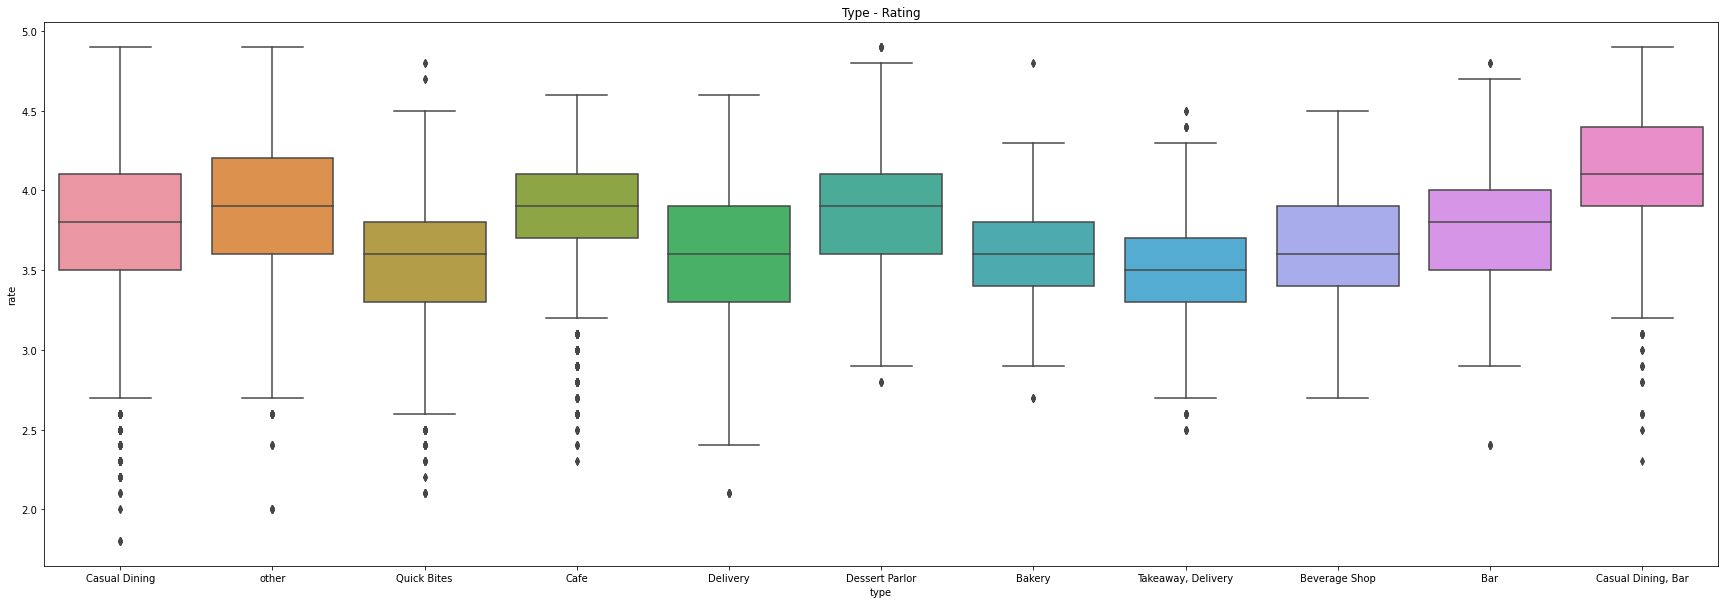

In [385]:
sns.boxplot(data = df, y="rate", x="type").set(title = "Type - Rating")

Observations:
  * most of the casual dining and quick bites having rating mean between 3.2 and 4.0
  * 

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

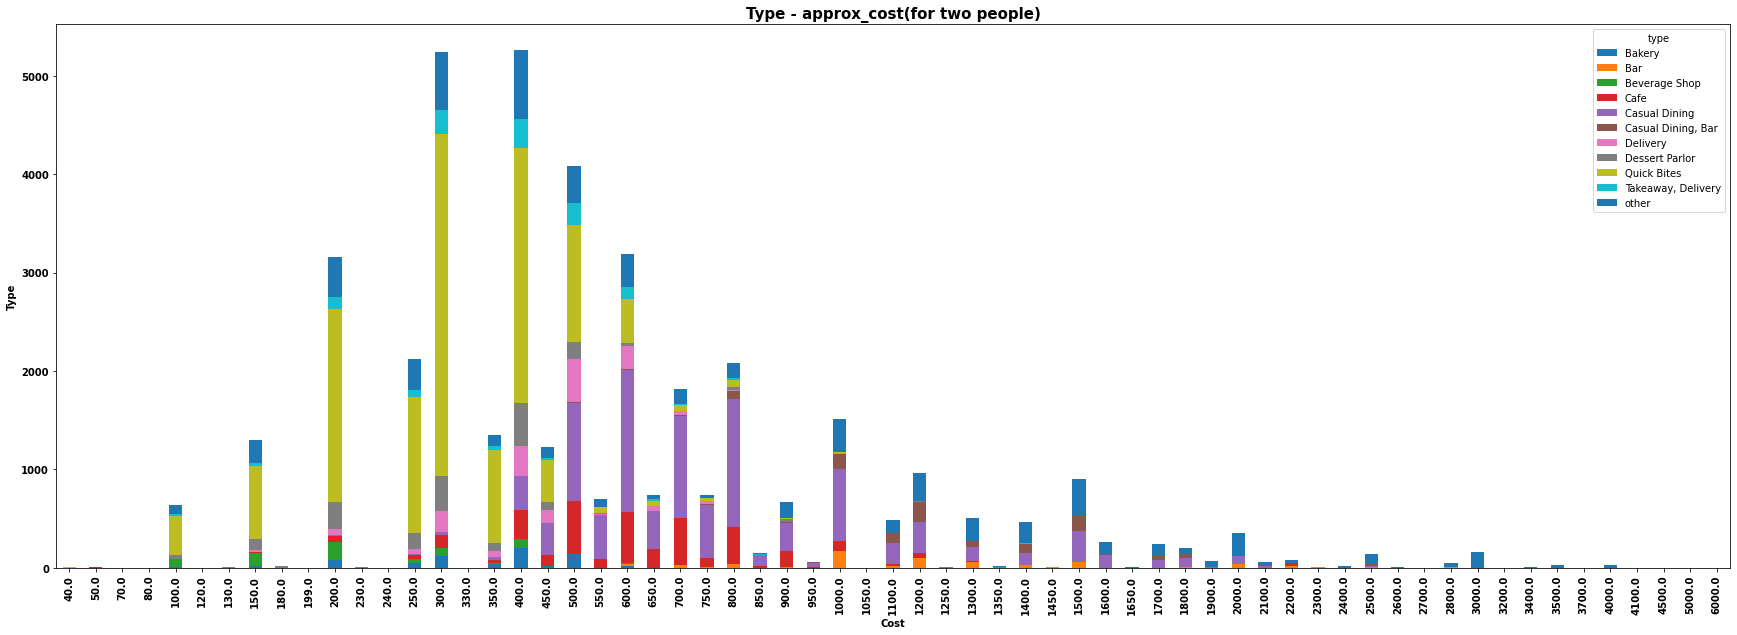

In [386]:

plt.rcParams["figure.figsize"] = (30,10)
type_plt=pd.crosstab(df['approx_cost(for two people)'],df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - approx_cost(for two people)',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Cost',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

In [387]:
import plotly.express as px

In [388]:
# sns.boxplot(data = df, y="approx_cost(for two people)", x="type").set(title = "Type - approx_cost(for two people)")
# df = px.data.tips()
fig = px.box(df, y="approx_cost(for two people)", x="type")
fig.show()

Observation:
  * approx_cost for two people in casual dining is around 600-900
  * approx_cost for two people in quick bites is around 200-400
  * approx_cost for two people in cafe  is around 500-800
  * number of bar having less than 1000 approx_cost for two people in banglur is very rare
  * number of cafes having greater than 1000 approx_cost for two people in banglur is very rare ( cost 400-850 )


Text(0.5, 0, 'Number of outlets')

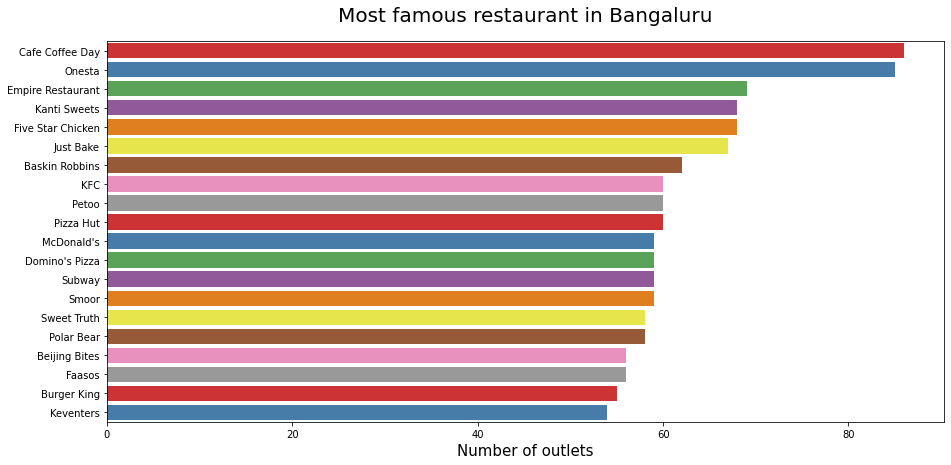

In [389]:
### most famous rest in Bangaluru
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

Observations:
  * most famous rest chain in bangaluru are
    1. Cafe Coffe Day
    2. Onesta
    3. 
    4. 
    5. 

### WordCloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)

In [ ]:
df_cp = df.copy()
df_cp.dropna(subset = ["dish_liked"],inplace=True)
print("no:of null values in dish_liked ==>",df_cp["dish_liked"].isnull().sum())

no:of null values in dish_liked ==> 0


In [ ]:
x = lambda x : x.split(",") if type(x) == str else [""]
df_cp["dish_liked"] = df_cp["dish_liked"].apply(x)
df_cp.head(3)

name  online_order  book_table  rate  votes      location  \
0            Jalsa             1           1   4.1    775  Banashankari   
1   Spice Elephant             1           0   4.1    787  Banashankari   
2  San Churro Cafe             1           0   3.8    918  Banashankari   

             rest_type                                         dish_liked  \
0        Casual Dining  [Pasta,  Lunch Buffet,  Masala Papad,  Paneer ...   
1        Casual Dining  [Momos,  Lunch Buffet,  Chocolate Nirvana,  Th...   
2  Cafe, Casual Dining  [Churros,  Cannelloni,  Minestrone Soup,  Hot ...   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   

  listed_in(type) listed_in(city)           type  
0          Buffet    Banashankari  Casual Dining  
1          Buffet    Banashankari  Casual Dining  
2          Buffet    Banashankari          other

In [ ]:
#create word cloud
def create_word_cloud(rest_type):
  # plt.title("word cloud of liked dishes in 9 type restarent")
  plt.figure(figsize = (20,30))
 
  for i,rest in enumerate(rest_type):
    dishes = ""
    plt.subplot(3,3,i+1)
    data = df_cp[df_cp["rest_type"] == rest]
    for words in data["dish_liked"]:
      tmp = []
      for word in words:
        tmp.append(word.lower())
      dishes += " ".join(tmp) + " "
    wordcloud = WordCloud(background_color="white", stopwords=stopwords, width = 1200, height = 1200).generate(dishes)  
    plt.imshow(wordcloud)
    plt.title(rest)

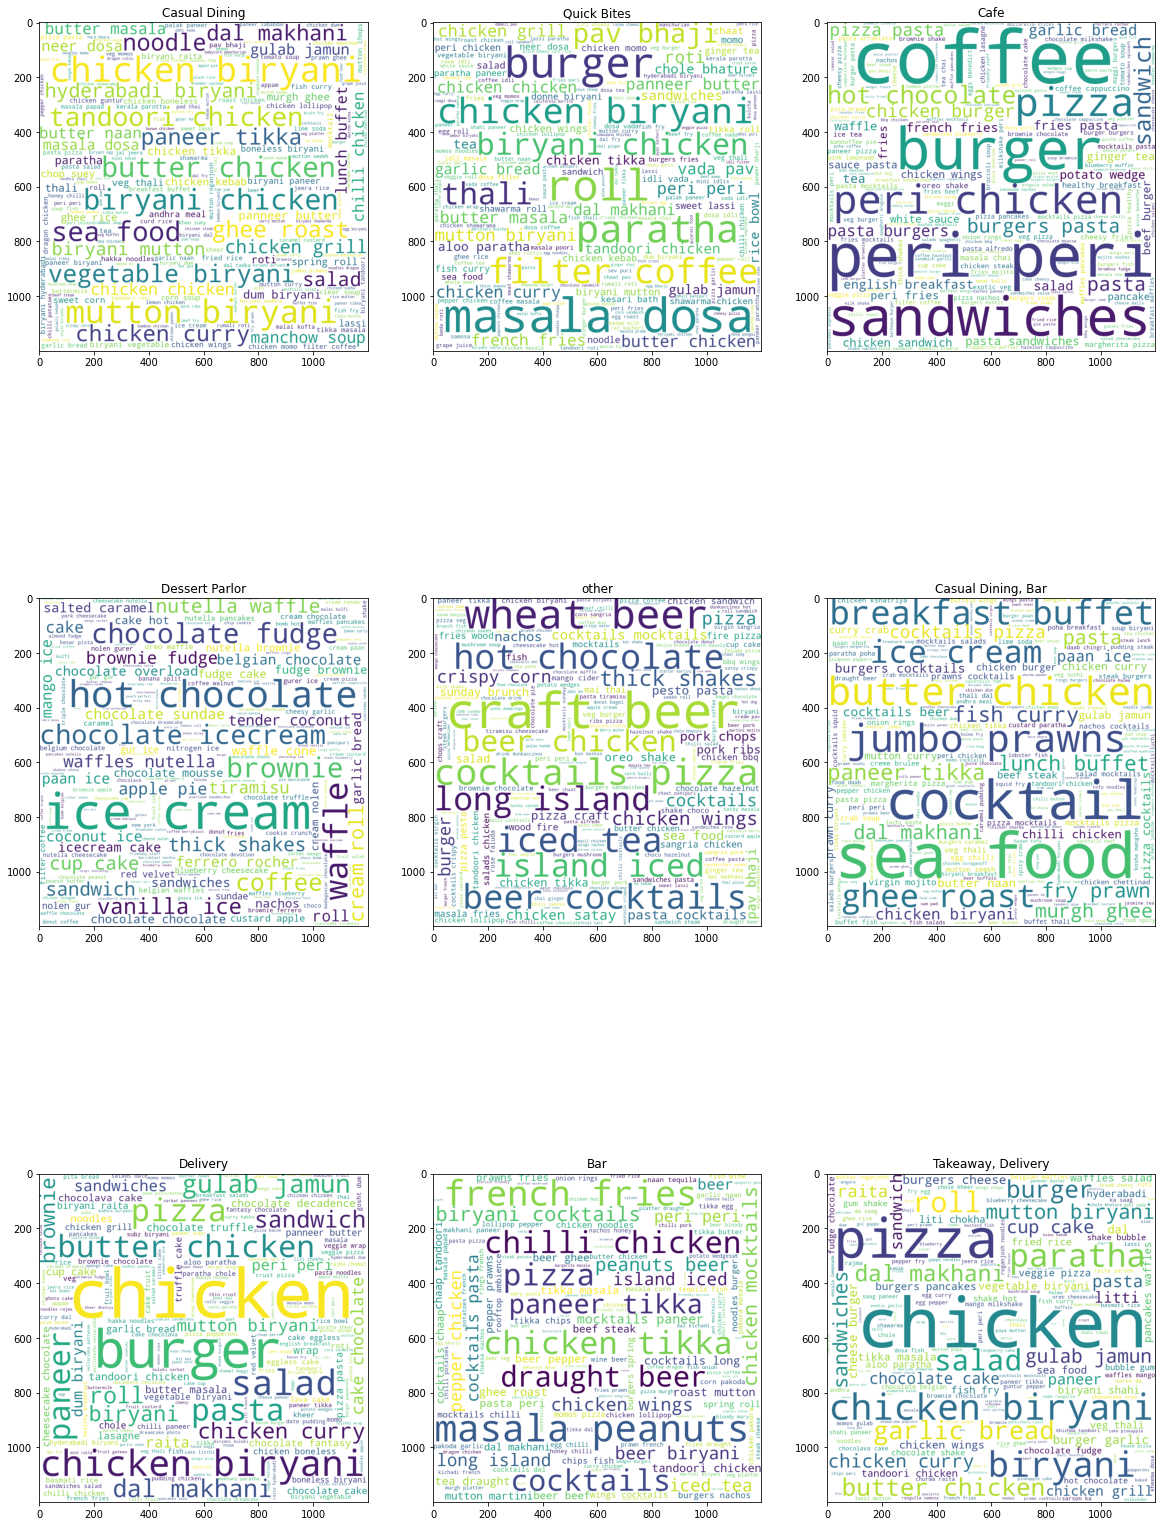

In [ ]:
rest_types = df_cp["rest_type"].value_counts()[:9].index
create_word_cloud(rest_types)

Observation:
Top 3 cuisines in banglure of 9 rest
1. **Casual Dining** 
  - North indian
  - Chinese
  - South indian
1. **Quick Bites** 
  - North indian
  - Chinese
  - South indian

1. **Cafe** 
  - North indian
  - Chinese
  - South indian

1. **Dessert Parlor** 
  - North indian
  - Chinese
  - South indian

1. **Casual Dining, Bar** 
  - North indian
  - Chinese
  - South indian



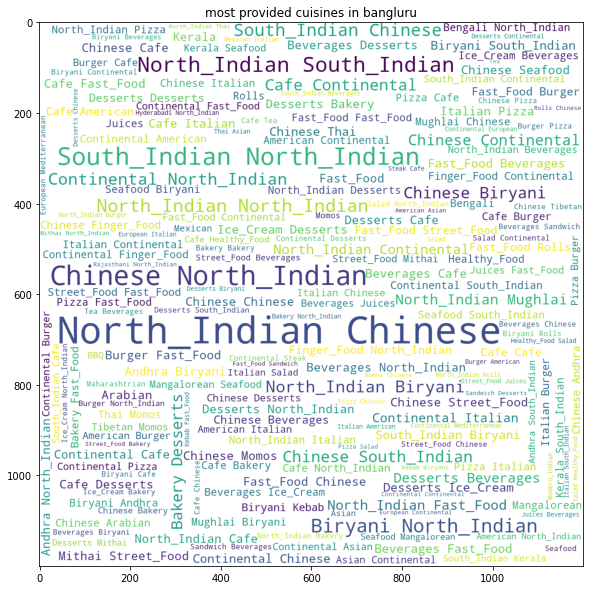

In [ ]:
#most provided cuisines in bangluru
def word_cloud_cuisines(data):
  cuisines = ""
  for cu in data:
    cuisines +=  " " + cu + " "
  wordcloud = WordCloud(background_color="white", stopwords=stopwords, width = 1200, height = 1200).generate(cuisines)  
  plt.imshow(wordcloud)
  plt.title("most provided cuisines in bangluru")

word_cloud_cuisines(df["cuisines"].str.replace(" ","_").str.replace(",_", " "))

Observation:
Top 3 cuisines in banglure
  1. North indian
  2. Chinese
  3. South indian

# Feature Engineering 

In [463]:
new_df = df.copy()

In [464]:
new_df

name  online_order  \
0                                                  Jalsa             1   
1                                         Spice Elephant             1   
2                                        San Churro Cafe             1   
3                                  Addhuri Udupi Bhojana             0   
4                                          Grand Village             0   
...                                                  ...           ...   
51709                         The Farm House Bar n Grill             0   
51711                                            Bhagini             0   
51712  Best Brews - Four Points by Sheraton Bengaluru...             0   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...             0   
51716                       The Nest - The Den Bengaluru             0   

       book_table  rate  votes                    location  \
0               1   4.1    775                Banashankari   
1               0   4.1    787                Banashankari   
2               0   3.8    918                Banashankari   
3               0   3.7     88                Banashankari   
4               0   3.8    166                Basavanagudi   
...           ...   ...    ...                         ...   
51709           0   3.7     34                  Whitefield   
51711           0   2.5     81                  Whitefield   
51712           0   3.6     27                  Whitefield   
51715           1   4.3    236  ITPL Main Road, Whitefield   
51716           0   3.4     13  ITPL Main Road, Whitefield   

                 rest_type                                         dish_liked  \
0            Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1            Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3              Quick Bites                                        Masala Dosa   
4            Casual Dining                                Panipuri, Gol Gappe   
...                    ...                                                ...   
51709   Casual Dining, Bar                                                NaN   
51711   Casual Dining, Bar                               Biryani, Andhra Meal   
51712                  Bar                                                NaN   
51715                  Bar                       Cocktails, Pizza, Buttermilk   
51716   Bar, Casual Dining                                                NaN   

                                          cuisines  \
0                   North Indian, Mughlai, Chinese   
1                      Chinese, North Indian, Thai   
2                           Cafe, Mexican, Italian   
3                       South Indian, North Indian   
4                         North Indian, Rajasthani   
...                                            ...   
51709                    North Indian, Continental   
51711  Andhra, South Indian, Chinese, North Indian   
51712                                  Continental   
51715                                  Finger Food   
51716       Finger Food, North Indian, Continental   

       approx_cost(for two people)  \
0                            800.0   
1                            800.0   
2                            800.0   
3                            300.0   
4                            600.0   
...                            ...   
51709                        800.0   
51711                        800.0   
51712                       1500.0   
51715                       2500.0   
51716                       1500.0   

                                            reviews_list menu_item  \
0      [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1      [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2      [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3      [('Rated 4.0', "RATED\n  Great food and proper...   

In [465]:
drop_cols = ["name","rest_type","votes","dish_liked", "reviews_list", "menu_item", "location", "listed_in(city)"]

In [466]:
new_df.drop(drop_cols, axis = 1,inplace = True)
new_df

online_order  book_table  rate  \
0                 1           1   4.1   
1                 1           0   4.1   
2                 1           0   3.8   
3                 0           0   3.7   
4                 0           0   3.8   
...             ...         ...   ...   
51709             0           0   3.7   
51711             0           0   2.5   
51712             0           0   3.6   
51715             0           1   4.3   
51716             0           0   3.4   

                                          cuisines  \
0                   North Indian, Mughlai, Chinese   
1                      Chinese, North Indian, Thai   
2                           Cafe, Mexican, Italian   
3                       South Indian, North Indian   
4                         North Indian, Rajasthani   
...                                            ...   
51709                    North Indian, Continental   
51711  Andhra, South Indian, Chinese, North Indian   
51712                                  Continental   
51715                                  Finger Food   
51716       Finger Food, North Indian, Continental   

       approx_cost(for two people) listed_in(type)                type  
0                            800.0          Buffet       Casual Dining  
1                            800.0          Buffet       Casual Dining  
2                            800.0          Buffet               other  
3                            300.0          Buffet         Quick Bites  
4                            600.0          Buffet       Casual Dining  
...                            ...             ...                 ...  
51709                        800.0   Pubs and bars  Casual Dining, Bar  
51711                        800.0   Pubs and bars  Casual Dining, Bar  
51712                       1500.0   Pubs and bars                 Bar  
51715                       2500.0   Pubs and bars                 Bar  
51716                       1500.0   Pubs and bars               other  

[41226 rows x 7 columns]

In [467]:
new_df["cuisines"] = new_df["cuisines"].str.lower()

In [468]:
new_df["cuisines"][0]

'north indian, mughlai, chinese'

In [469]:
# x = lambda x: ", ".join(x)
# df["cuisines"] = df["cuisines"].apply(x)
cols = new_df["cuisines"].value_counts()[:20].index

def convert(x):
  if x in cols:
    return x
  return "other"

new_df["cuisines"] = new_df["cuisines"].apply(convert)

In [470]:
new_df["type"].unique()

array(['Casual Dining', 'other', 'Quick Bites', 'Cafe', 'Delivery',
       'Dessert Parlor', 'Bakery', 'Takeaway, Delivery', 'Beverage Shop',
       'Bar', 'Casual Dining, Bar'], dtype=object)

In [471]:
new_df["cuisines"].unique()

array(['other', 'south indian, north indian', 'north indian', 'cafe',
       'bakery, desserts', 'biryani', 'south indian',
       'north indian, chinese', 'ice cream, desserts',
       'desserts, beverages', 'chinese', 'bakery', 'fast food',
       'mithai, street food', 'desserts',
       'south indian, north indian, chinese', 'chinese, north indian',
       'desserts, ice cream', 'finger food', 'chinese, momos',
       'north indian, chinese, biryani'], dtype=object)

In [472]:
new_df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [473]:
from sklearn.model_selection import train_test_split

X = new_df.drop(["rate"], axis =1)
y = new_df["rate"]

In [474]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1337)

In [475]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((32980, 6), (8246, 6), (32980,), (8246,))

**Baseline Model**

In [476]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.ensemble import RandomForestRegressor

In [477]:
def base_model_evaluation(X_train,y_train,X_test,y_test):
  base_model = RandomForestRegressor()
  base_model.fit(X_train, y_train)
  score = base_model.score(X_test,y_test)
  y_pred = base_model.predict(X_test)
  mse = MSE(y_test, y_pred)
  rmse = np.sqrt(MSE(y_test, y_pred))
  mae = MAE(y_test, y_pred)
  r2 = R2(y_test, y_pred)
  print(f"score => {score}\nmse => {mse}\nrmse => {rmse}\nmae => {mae}\nr2 => {r2}")
  plt.title("prediction vs actual values")
  plt.scatter(x = range(0,y_test.shape[0]),y = y_pred - y_test)
  plt.plot([0]*y_test.shape[0],c = "r", linewidth = '5.5')
  plt.show()

**label encoding**

In [478]:
from sklearn.preprocessing import LabelEncoder

type_transform = LabelEncoder()
cuisines_transform = LabelEncoder()
listed_in_type_transform = LabelEncoder()

In [479]:
X_train["type"] = type_transform.fit_transform(X_train["type"])
X_train["cuisines"] = cuisines_transform.fit_transform(X_train["cuisines"])
X_train["listed_in(type)"] = listed_in_type_transform.fit_transform(X_train["listed_in(type)"])

In [480]:
X_test["type"] = type_transform.transform(X_test["type"])
X_test["cuisines"] = cuisines_transform.transform(X_test["cuisines"])
X_test["listed_in(type)"] = listed_in_type_transform.transform(X_test["listed_in(type)"])

In [481]:
X_train

online_order  book_table  cuisines  approx_cost(for two people)  \
8615              1           0        14                        500.0   
29303             0           0        17                        900.0   
2779              1           0        17                        250.0   
21109             1           0        17                        750.0   
44380             1           0        17                        700.0   
...             ...         ...       ...                          ...   
27770             1           0        17                        300.0   
24829             1           0        17                        350.0   
11847             1           0        17                        500.0   
42253             1           0         3                        300.0   
3978              1           0        17                        400.0   

       listed_in(type)  type  
8615                 2     4  
29303                1    10  
2779                 2    10  
21109                4     4  
44380                3     3  
...                ...   ...  
27770                2     9  
24829                4     8  
11847                2     3  
42253                1     3  
3978                 2     4  

[32980 rows x 6 columns]

score => 0.3926474885536846
mse => 0.11792788590224607
rmse => 0.3434062985768404
mae => 0.25757063537344577
r2 => 0.3926474885536846


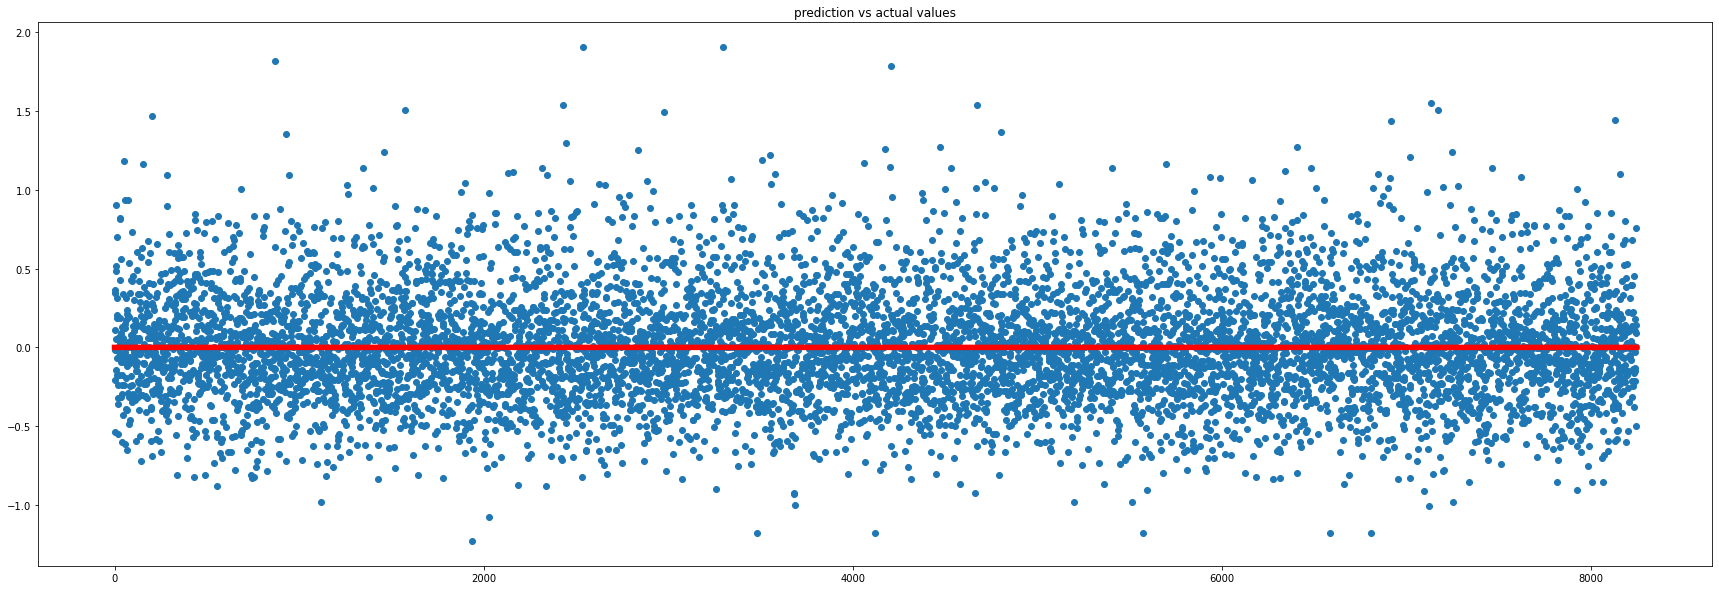

In [482]:
base_model_evaluation(X_train,y_train,X_test,y_test)

### save dataset and encoders

In [486]:
train_data = pd.concat([X_train,y_train], axis = 1)
test_data = pd.concat([X_test,y_test], axis = 1)

In [488]:
train_data.to_csv("train.csv")

In [489]:
test_data.to_csv("test.csv")

In [491]:
import pickle

output = open('type_encoder.pkl', 'wb')
pickle.dump(type_transform, output)
output.close()

output = open('cuisines_encoder.pkl', 'wb')
pickle.dump(cuisines_transform, output)
output.close()

output = open('listed_in_type_encoder.pkl', 'wb')
pickle.dump(listed_in_type_transform, output)
output.close()

**normalize features**

In [454]:
from sklearn.preprocessing import MinMaxScaler

cuisines_norm = MinMaxScaler()
approx_cost_norm = MinMaxScaler()
listed_in_norm = MinMaxScaler()
type_norm = MinMaxScaler()

test_p = X_train

In [455]:
cuisines_norm.fit_transform(np.array(X_train["approx_cost(for two people)"]).reshape(-1,1))

array([[0.07718121],
       [0.1442953 ],
       [0.0352349 ],
       ...,
       [0.07718121],
       [0.04362416],
       [0.06040268]])

In [456]:
X_train["cuisines"] = cuisines_norm.fit_transform(X_train["cuisines"].to_numpy().reshape(-1,1))
X_train["approx_cost(for two people)"] = approx_cost_norm.fit_transform(X_train["approx_cost(for two people)"].to_numpy().reshape(-1,1))
X_train["listed_in(type)"] = listed_in_norm.fit_transform(X_train["listed_in(type)"].to_numpy().reshape(-1,1))
X_train["type"] = type_norm.fit_transform(X_train["type"].to_numpy().reshape(-1,1))

In [457]:
X_test["cuisines"] = cuisines_norm.transform(X_test["cuisines"].to_numpy().reshape(-1,1))
X_test["approx_cost(for two people)"] = approx_cost_norm.transform(X_test["approx_cost(for two people)"].to_numpy().reshape(-1,1))
X_test["listed_in(type)"] = listed_in_norm.transform(X_test["listed_in(type)"].to_numpy().reshape(-1,1))
X_test["type"] = type_norm.transform(X_test["type"].to_numpy().reshape(-1,1))

In [461]:
X_train

online_order  book_table  cuisines  approx_cost(for two people)  \
8615              1           0      0.70                     0.077181   
29303             0           0      0.85                     0.144295   
2779              1           0      0.85                     0.035235   
21109             1           0      0.85                     0.119128   
44380             1           0      0.85                     0.110738   
...             ...         ...       ...                          ...   
27770             1           0      0.85                     0.043624   
24829             1           0      0.85                     0.052013   
11847             1           0      0.85                     0.077181   
42253             1           0      0.15                     0.043624   
3978              1           0      0.85                     0.060403   

       listed_in(type)  type  
8615          0.333333   0.4  
29303         0.166667   1.0  
2779          0.333333   1.0  
21109         0.666667   0.4  
44380         0.500000   0.3  
...                ...   ...  
27770         0.333333   0.9  
24829         0.666667   0.8  
11847         0.333333   0.3  
42253         0.166667   0.3  
3978          0.333333   0.4  

[32980 rows x 6 columns]

In [459]:
X_test

online_order  book_table  cuisines  approx_cost(for two people)  \
12147             1           0      0.35                     0.060403   
36031             0           0      0.85                     0.085570   
14635             1           0      0.85                     0.127517   
48336             0           0      0.70                     0.043624   
24003             1           0      0.20                     0.110738   
...             ...         ...       ...                          ...   
29882             1           1      0.20                     0.177852   
30619             0           0      0.85                     0.043624   
21035             0           1      0.85                     0.177852   
24627             0           0      0.85                     0.052013   
32687             1           0      0.70                     0.035235   

       listed_in(type)  type  
12147         0.333333   0.7  
36031         0.333333   0.4  
14635         0.166667   0.3  
48336         0.666667   1.0  
24003         0.333333   1.0  
...                ...   ...  
29882         0.333333   0.4  
30619         0.333333   0.6  
21035         0.666667   0.4  
24627         0.500000   1.0  
32687         0.333333   0.8  

[8246 rows x 6 columns]

score => 0.39213950237912487
mse => 0.11802652011302876
rmse => 0.34354988009462145
mae => 0.25769714179294717
r2 => 0.39213950237912487


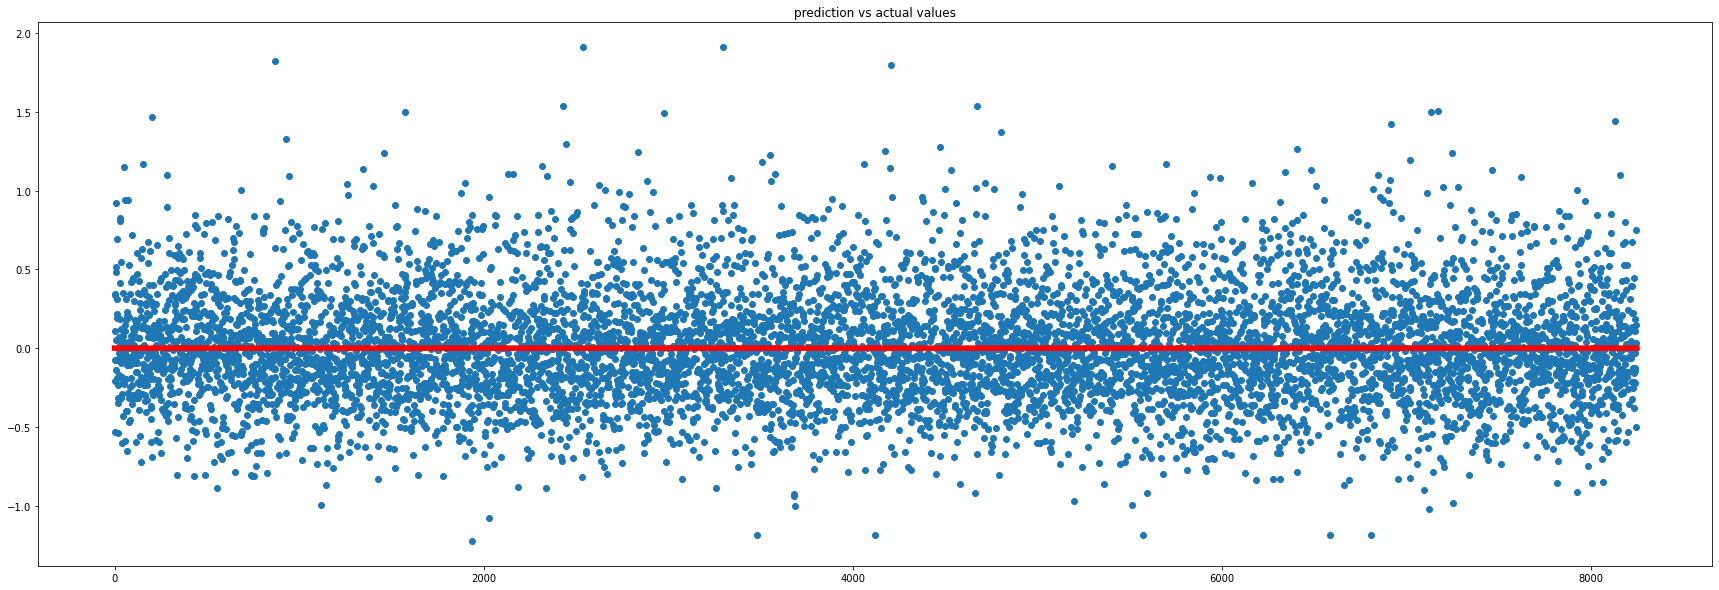

In [460]:
base_model_evaluation(X_train,y_train,X_test,y_test)

### Data Correaltions 

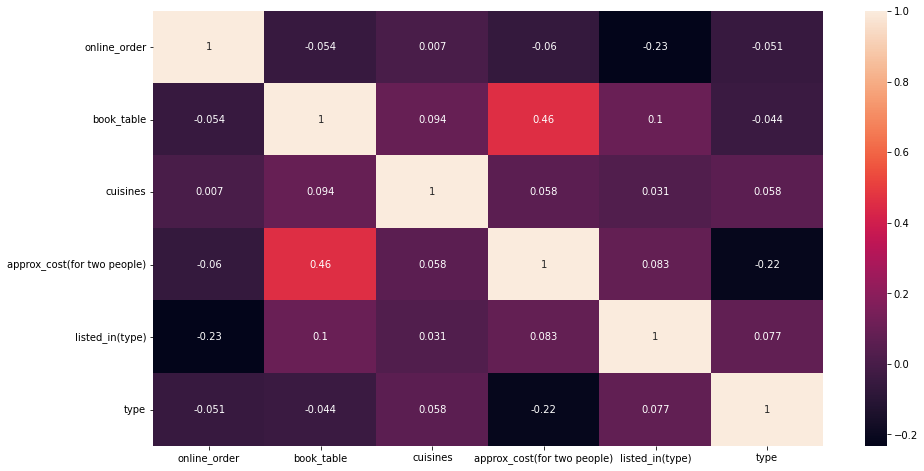

In [462]:
#Get Correlation between different variables
corr = X_train.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
# df.columns